# CLT with dice

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

In [2]:
def throwOneDie(HowOften):
    flatRandom = np.random.random(HowOften) # gives me a numpy array
    #turn it into integers from 1 to 6:
    return np.trunc(flatRandom*6)+1  #numpy way of saying: return [int(x*6)+1 for x in flatRandom]

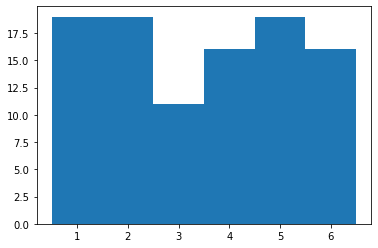

In [3]:
oneDieRandom = throwOneDie(100)
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [4]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [5]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.45 , sigma =  1.7628102563804189


Now let's throw multiple dice

In [6]:
def sumMultiRandom(PDF, NDice=10, Nevents=1000): 
    # we'll write it such that we can give it various PDFs, not just dice
    # For dice we'll pass throwOneDie as first argument
    randomNumbers=PDF(Nevents)
    if NDice == 1: return randomNumbers
    
    for counter in range(NDice-1):
        randomNumbers += PDF(Nevents)  
        ## above line is the numpy way of saying
        ## newRandomNumbers = PDF(Nevents)
        ## randomNumbers = [x + y for x, y in zip(randomNumbers, newRandomNumbers)]
    return randomNumbers

We'll also need to be able to draw a Gaussian, for comparison

In [7]:
def gauss(x, mean, sigma):
    Del = (x-mean)/sigma
    return 1.0/(np.sqrt(2*pi)*sigma)  *  np.exp(-0.5*Del*Del)

Now let's put it all together in one neat function

In [8]:
def doAll(PDF, NDice=1, Nevents=1000, histoBins=-1, histoMin=999, histoMax=-999, showGauss=0, average=0):

    RandomDice = sumMultiRandom(PDF, NDice=NDice, Nevents=Nevents)
    if average:
        RandomDice /= NDice  # RandomDice a numpy array so this means every element will be divided by NDice
    mini=histoMin
    maxi=histoMax

    if(histoMax < histoMin):
        mini=NDice -0.5
        maxi=NDice*6 + 0.5
        if average:
            mini /= NDice
            maxi /= NDice
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi - mini)
    if average: bins=int((maxi-mini)*NDice)
        
    if histoBins > 0 : bins=histoBins
    
    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram

    mu, var, sigma = meanAndStdev(RandomDice)
    
    if showGauss:
        oversampling=10
        dx = (maxi-mini)/bins
        xArray=np.arange(mini, maxi, dx/oversampling)
        plt.plot(xArray,gauss(xArray, mu, sigma)*dx*Nevents)

    plt.show()
    
    print("For ", NDice, " random numbers added ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)

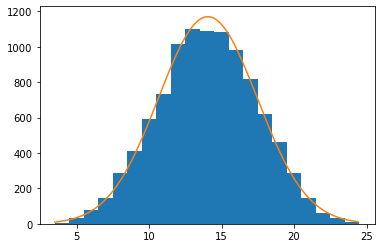

For  4  random numbers added  10000  times:
mean =  14.0508 , variance =  11.637619359999974 , sigma =  3.4113955150348625


In [9]:
doAll(throwOneDie, 4, 10000, showGauss=1)

###### Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected, and let's also compare it to a Gaussian

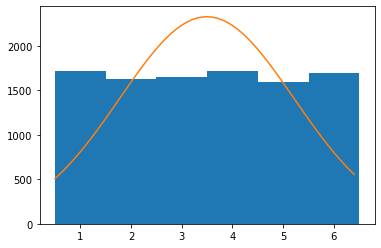

For  1  random numbers added  10000  times:
mean =  3.4948 , variance =  2.942172959999999 , sigma =  1.7152763509125866


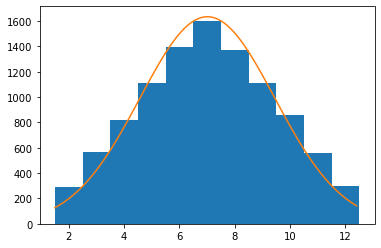

For  2  random numbers added  10000  times:
mean =  7.0106 , variance =  5.953087639999993 , sigma =  2.4398950059377538


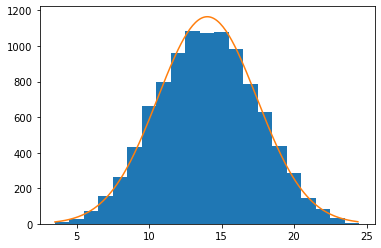

For  4  random numbers added  10000  times:
mean =  14.0129 , variance =  11.733133589999994 , sigma =  3.425366197941469


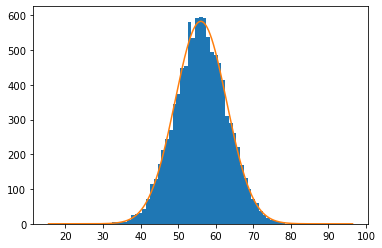

For  16  random numbers added  10000  times:
mean =  56.0091 , variance =  46.87401719000036 , sigma =  6.84646019414415


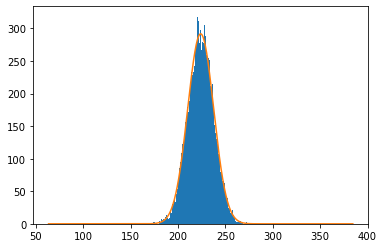

For  64  random numbers added  10000  times:
mean =  223.9369 , variance =  187.03191838999192 , sigma =  13.67596133330275


In [10]:
doAll(throwOneDie,  1, 10000, showGauss=1)
doAll(throwOneDie,  2, 10000, showGauss=1)
doAll(throwOneDie,  4, 10000, showGauss=1)
doAll(throwOneDie, 16, 10000, showGauss=1)
doAll(throwOneDie, 64, 10000, showGauss=1)

What happens if we average, instead of sum? According to the lectures, the mean should stay constant, but the variance should go down with NDice (and the standard deviation with \sqrt{NDICE}. Let's check:

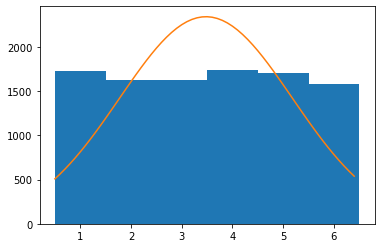

For  1  random numbers added  10000  times:
mean =  3.4782 , variance =  2.903124759999999 , sigma =  1.7038558507103818


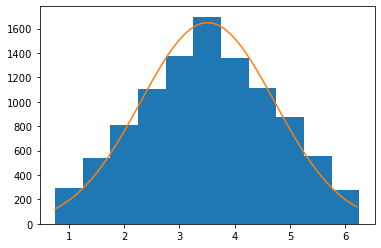

For  2  random numbers added  10000  times:
mean =  3.50955 , variance =  1.4648837975000006 , sigma =  1.210323839928802


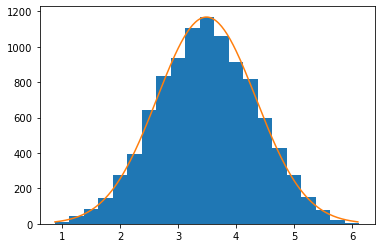

For  4  random numbers added  10000  times:
mean =  3.489625 , variance =  0.7289861093749987 , sigma =  0.8538068337598375


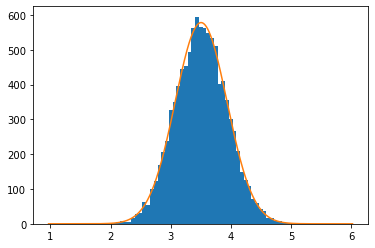

For  16  random numbers added  10000  times:
mean =  3.50611875 , variance =  0.18600357652343646 , sigma =  0.43128131946959686


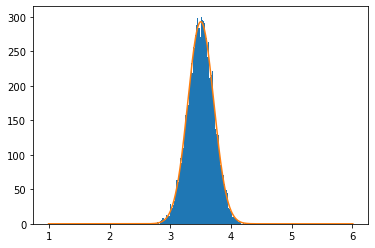

For  64  random numbers added  10000  times:
mean =  3.5007828125 , variance =  0.04534374755615467 , sigma =  0.21294071371195003


In [11]:
doAll(throwOneDie,  1, 10000, showGauss=1, average=1)
doAll(throwOneDie,  2, 10000, showGauss=1, average=1)
doAll(throwOneDie,  4, 10000, showGauss=1, average=1)
doAll(throwOneDie, 16, 10000, showGauss=1, average=1)
doAll(throwOneDie, 64, 10000, showGauss=1, average=1)

So... averaging clearly is good for you - the error goes down with 1/sqrt(N), where N is the number of experiments (here: throws of a die) that you average over.

Does it also work with other distributions? Let's try a triangular shaped one

In [12]:
def throwTriangle(HowOften):
    flat = np.random.random(HowOften)
    ## we'll use a coordinate transformation to make a triangular distribution
    triangleRandom = np.sqrt(flat)  # this is the numpy way of saying: triangleRandom = [sqrt(x) for x in flat]
    #turn it into integers from 1 to 6: (not really needed, but why not) and return
    return np.trunc(triangleRandom*6) + 1  # numpy version of:  return [int(x*6)+1 for x in triangleRandom]
# note that I am turing the random numbers into integers between 1 and 6 simply to keep the
# analogy to the dice. There is no other reason for this.
# For demonstrating the CLT. real numbers are just fine.
# - the the exponential example further down for an example with real numbers.


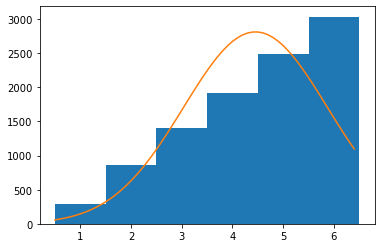

For  1  random numbers added  10000  times:
mean =  4.4536 , variance =  2.0116470400000033 , sigma =  1.418325435152315


In [13]:
doAll(throwTriangle, 1, 10000, showGauss=1)

and for now summing triangles:

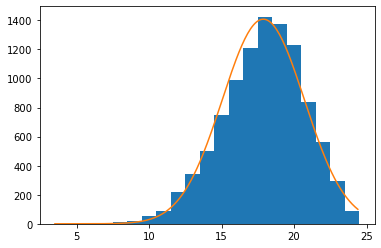

For  4  random numbers added  10000  times:
mean =  17.8791 , variance =  8.029283190000001 , sigma =  2.833598981860348


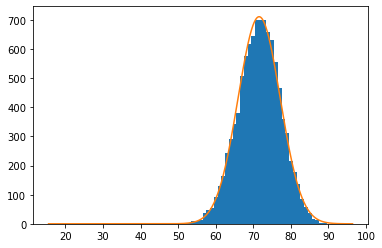

For  16  random numbers added  10000  times:
mean =  71.5421 , variance =  31.44622758999958 , sigma =  5.607693607000972


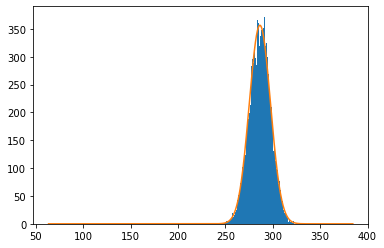

For  64  random numbers added  10000  times:
mean =  286.4119 , variance =  125.12123838999833 , sigma =  11.18576051907059


In [14]:
doAll(throwTriangle,  4, 10000, showGauss=1)
doAll(throwTriangle, 16, 10000, showGauss=1)
doAll(throwTriangle, 64, 10000, showGauss=1)

...and averaging triangles:

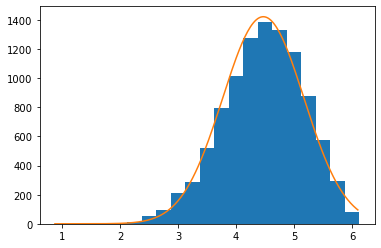

For  4  random numbers added  10000  times:
mean =  4.469475 , variance =  0.4922994743749989 , sigma =  0.7016405592431205


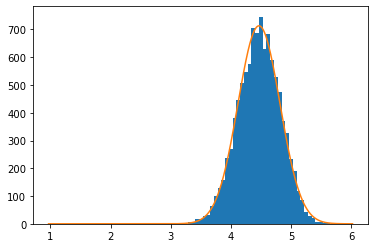

For  16  random numbers added  10000  times:
mean =  4.4688875 , variance =  0.12220466859374923 , sigma =  0.34957784339650194


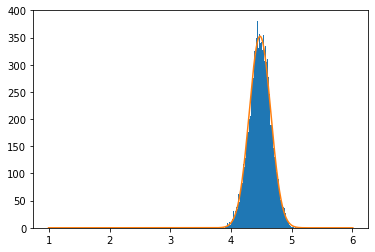

For  64  random numbers added  10000  times:
mean =  4.476959375 , variance =  0.03128070186523857 , sigma =  0.17686351196682307


In [15]:
doAll(throwTriangle,  4, 10000, showGauss=1, average=1)
doAll(throwTriangle, 16, 10000, showGauss=1, average=1)
doAll(throwTriangle, 64, 10000, showGauss=1, average=1)

So it also works for a distribution as asymmetric and the triangle. Of course it also works for continuous distributions. Let's try an exponential.

In [16]:
def expo(Nevents):
    expoSample = np.random.exponential(scale = 1, size=Nevents)
    return expoSample

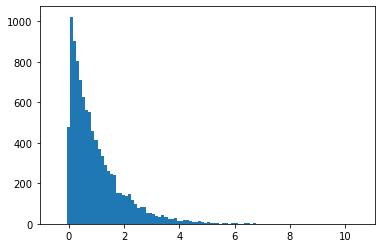

For  1  random numbers added  10000  times:
mean =  0.9826635910353257 , variance =  0.9515180210719604 , sigma =  0.9754578520223005


In [17]:
doAll(expo, 1, 10000, 100, showGauss=0)

Summing exponentials:

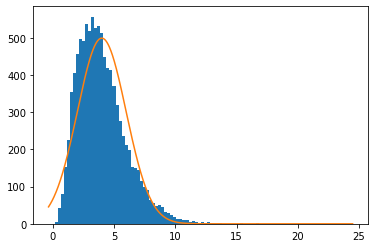

For  4  random numbers added  10000  times:
mean =  3.999791442003692 , variance =  3.938393149543238 , sigma =  1.9845385230685844


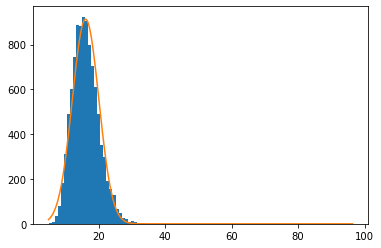

For  16  random numbers added  10000  times:
mean =  15.948309128986669 , variance =  16.060229988575145 , sigma =  4.007521676619497


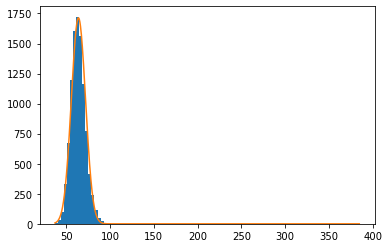

For  64  random numbers added  10000  times:
mean =  63.9592481227057 , variance =  65.40258210405955 , sigma =  8.087186290920938


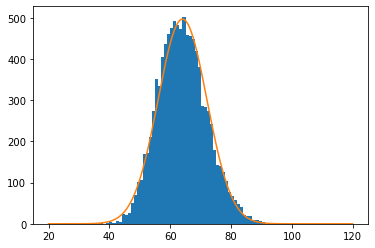

For  64  random numbers added  10000  times:
mean =  64.01178314665353 , variance =  64.37931389115602 , sigma =  8.023672095191579


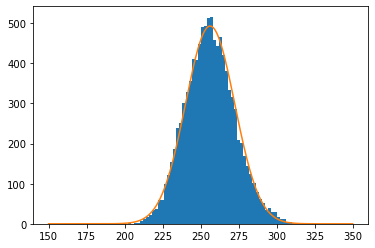

For  256  random numbers added  10000  times:
mean =  256.17332722882014 , variance =  262.2102166195691 , sigma =  16.192906367282223


In [18]:
doAll(expo,   4, 10000, 100, showGauss=1)
doAll(expo,  16, 10000, 100, showGauss=1)
doAll(expo,  64, 10000, 100, showGauss=1)
doAll(expo,  64, 10000, 100,  20, 120, showGauss=1) # zoom in a bit
doAll(expo, 256, 10000, 100, 150, 350, showGauss=1) # this will take a while

... and averaging them:

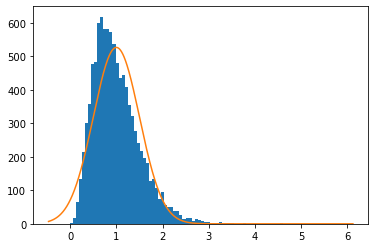

For  4  random numbers added  10000  times:
mean =  0.9992411083747764 , variance =  0.2498548030667268 , sigma =  0.499854781978453


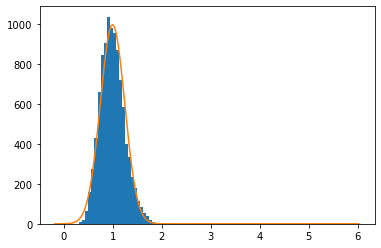

For  16  random numbers added  10000  times:
mean =  0.9973967480539441 , variance =  0.061756621247183174 , sigma =  0.24850879511032034


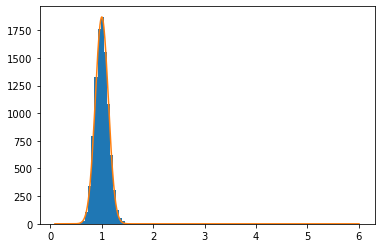

For  64  random numbers added  10000  times:
mean =  0.9986625093210513 , variance =  0.015964259420932936 , sigma =  0.12634975037938515


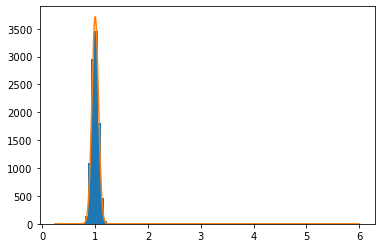

For  256  random numbers added  10000  times:
mean =  1.000536004001921 , variance =  0.0038255500658412878 , sigma =  0.061851031243151375


In [19]:
doAll(expo,   4, 10000, 100, showGauss=1, average=1)
doAll(expo,  16, 10000, 100, showGauss=1, average=1)
doAll(expo,  64, 10000, 100, showGauss=1, average=1)
doAll(expo, 256, 10000, 100, showGauss=1, average=1) # this will take a while

Note that all of the above looks much smoother and nicer with 100,000 rather than 10,000 events; but that'll take a while to run.

# Now repeat with your own probability distribution - can you find one that does not become Gaussian?